In [1]:
#find the disparity map from the stereo images.
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def sum_of_abs_diff(pixel_vals_1, pixel_vals_2):

    #if pixel_vals_1.shape != pixel_vals_2.shape:
        #return 1000
        
    return np.sum(abs(pixel_vals_1 - pixel_vals_2))


In [3]:
#MINE
BLOCK_SIZE = 7
SEARCH_BLOCK_SIZE = 56

def compare_blocks(y, x, block_left, right_array):
    global BLOCK_SIZE

    # Get search range for the right image
    x_min = max(0, x - SEARCH_BLOCK_SIZE)
    x_max = min(right_array.shape[1], x + SEARCH_BLOCK_SIZE)
    #print(f'search bounding box: ({y, x_min}, ({y, x_max}))')
    first = True
    min_sad = None
    min_index = None
    for x in range(x_min, x_max):
        
        block_right = right_array[y:min(y+block_left.shape[0],right_array.shape[0]),x:min(x+block_left.shape[1],right_array.shape[1])]
       
        if(block_left.shape==block_right.shape):
            sad = sum_of_abs_diff(block_left, block_right)
            #print(f'sad: {sad}, {y, x}')


            if first:
                min_sad = sad
                min_index = (y, x)
                first = False
            else:
                if sad < min_sad:
                    min_sad = sad
                    min_index = (y, x)

    return min_index

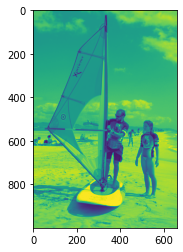

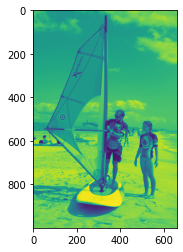

In [4]:
# img=cv2.imread('img4.jfif',0)
# plt.imshow(img,cmap="gray")
# plt.show()
# print(img.shape)
# imgL = img[:,:int(img.shape[1]/2)]
# imgR = img[:,int(img.shape[1]/2):]
imgL=cv2.imread('left8.jpg',0)
imgR=cv2.imread('right8.jpg',0)
plt.imshow(imgL)
plt.show()
plt.imshow(imgR)
plt.show()

In [5]:
h, w = imgL.shape
disparity_map = np.zeros((h, w))

for y in range(imgL.shape[0]):
    for x in range(imgL.shape[1]):
        block_left= imgL[y:min(y+BLOCK_SIZE,imgL.shape[0]),x:min(x+BLOCK_SIZE,imgL.shape[1])]
        right_array = imgR
        min_index = compare_blocks(y, x, block_left, right_array)
        disparity_map[y,x] = abs(min_index[1] - x)

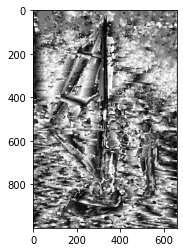

In [6]:
plt.imshow(disparity_map,cmap="gray")

In [8]:
cv2.imwrite("output.jpg", disparity_map)

True